In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/my_datasets/jewellery/test.zip

Archive:  /content/drive/MyDrive/my_datasets/jewellery/test.zip
   creating: test/
   creating: test/BRACELET/
  inflating: test/BRACELET/$_3.jpeg  
  inflating: test/BRACELET/10047527649310.jpg  
  inflating: test/BRACELET/18ct-white-gold-2-row-akoya-pearl-0-92ct-diamond-bracelet-p875-4916_image.jpg  
  inflating: test/BRACELET/365-00492_1400x.jpg  
  inflating: test/BRACELET/71g9Xj0Gy6L._UY395_.jpg  
  inflating: test/BRACELET/7350_main.jpeg  
  inflating: test/BRACELET/antique-diamond-bracelet-36-0.jpg  
  inflating: test/BRACELET/Aradhya-Designer-18k-Gold-Plated-SDL044078684-1-bfa9e.JPG  
  inflating: test/BRACELET/B0003CLP.jpg  
  inflating: test/BRACELET/bm5_ssc.jpg  
  inflating: test/BRACELET/bracelet_001.jpg  
  inflating: test/BRACELET/bracelet_002.jpg  
  inflating: test/BRACELET/bracelet_003.jpg  
  inflating: test/BRACELET/bracelet_004.jpg  
  inflating: test/BRACELET/bracelet_005.jpg  
  inflating: test/BRACELET/bracelet_006.jpg  
  inflating: test/BRACELET/bracelet_007.j

In [4]:
!unzip /content/drive/MyDrive/my_datasets/jewellery/training.zip

Archive:  /content/drive/MyDrive/my_datasets/jewellery/training.zip
   creating: training/
   creating: training/BRACELET/
  inflating: training/BRACELET/-1117Wx1400H-6005273160-multi-MODEL.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6005273170-multi-MODEL.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6005278440-multi-MODEL2.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6005691740-multi-MODEL.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6005926090-multi-MODEL2.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6006037310-multi-MODEL3.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6006125020-multi-MODEL.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6006125750-multi-MODEL.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6006176280-multi-MODEL2.jpg  
  inflating: training/BRACELET/-1117Wx1400H-6006194870-multi-MODEL.jpg  
  inflating: training/BRACELET/-288Wx360H-6005273160-multi-MODEL.jpg  
  inflating: training/BRACELET/-288Wx360H-6005273170-multi-MODEL.jpg  
 

In [10]:
# PART 1 - IMPORT LIBRARIES AND PACKAGES

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [11]:
batch_size = 32
from keras.preprocessing.image import ImageDataGenerator

# Define the augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255, # Rescale pixel values to be between 0 and 1
    rotation_range=40, # Rotate images randomly up to 40 degrees
    width_shift_range=0.2, # Shift images horizontally up to 20% of the width
    height_shift_range=0.2, # Shift images vertically up to 20% of the height
    #brightness_range=[0.5, 1.5], # Adjust brightness of the image randomly
    shear_range=0.2, # Shear images randomly up to 20%
    zoom_range=[0.8, 1.2], # Zoom images randomly up to 20%
    channel_shift_range=20.0, # Shift the channels of the image randomly
    fill_mode='nearest', # Fill in any empty pixels with the nearest value
    cval=0.0, # Value used for points outside the boundaries when fill_mode is "constant"
    horizontal_flip=True, # Flip images horizontally
    vertical_flip=True, # Flip images vertically
    preprocessing_function=None, # Function applied to each input after being randomly transformed
    data_format=None, # Image data format, either "channels_first" or "channels_last"
    #validation_split=0.0 # Fraction of images to reserve for validation (used for validation_data)
)

valid_datagen =ImageDataGenerator(
    rescale=1./255, # Rescale pixel values to be between 0 and 1
    rotation_range=40, # Rotate images randomly up to 40 degrees
    width_shift_range=0.2, # Shift images horizontally up to 20% of the width
    height_shift_range=0.2, # Shift images vertically up to 20% of the height
    #brightness_range=[0.5, 1.5], # Adjust brightness of the image randomly
    shear_range=0.2, # Shear images randomly up to 20%
    zoom_range=[0.8, 1.2], # Zoom images randomly up to 20%
    channel_shift_range=20.0, # Shift the channels of the image randomly
    fill_mode='nearest', # Fill in any empty pixels with the nearest value
    cval=0.0, # Value used for points outside the boundaries when fill_mode is "constant"
    horizontal_flip=True, # Flip images horizontally
    vertical_flip=True, # Flip images vertically
    preprocessing_function=None, # Function applied to each input after being randomly transformed
    data_format=None, # Image data format, either "channels_first" or "channels_last"
    #validation_split=0.0 # Fraction of images to reserve for validation (used for validation_data)
)

In [12]:

# PART 3 - CREATING LABELLED DATA
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        directory="/content/training",  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        color_mode="rgba", # Set color mode to RGB
        # Specify the classes explicitly
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode="categorical")

# Flow validation images in batches of 128 using valid_datagen generator
valid_generator = valid_datagen.flow_from_directory(
        directory="/content/test",  # This is the source directory for validation images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        color_mode="rgba", # Set color mode to RGB
        # Specify the classes explicitly
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode="categorical")

Found 3249 images belonging to 5 classes.
Found 579 images belonging to 5 classes.


In [13]:

# mention classes

class_names=list(train_generator.class_indices)
class_names

['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH']

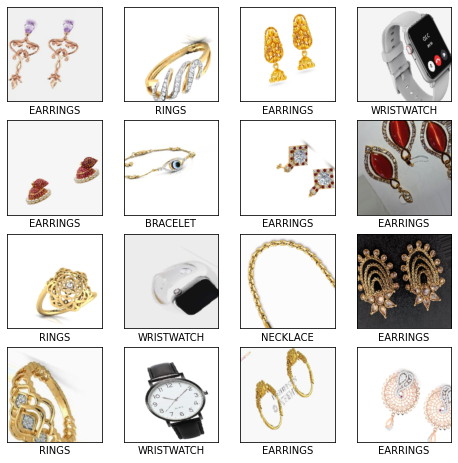

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, labels, class_names, num_images=16):
    """
    Display a list of images with their corresponding labels.

    Parameters:
    images (np.ndarray): A numpy array of images to display.
    labels (np.ndarray): A numpy array of labels for the images.
    class_names (list): A list of class names for the labels.
    num_images (int): The number of images to display. Default is 16.
    """

    fig, axes = plt.subplots(4, 4, figsize=(8, 8),
                             subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        # Display the image
        ax.imshow(images[i])

        # Get the label for the image
        label_index = np.argmax(labels[i])
        label = class_names[label_index]

        # Display the label below the image
        ax.set_xlabel(label)

        if i >= num_images - 1:
            break

    plt.show()

# Load a batch of images and labels from the generator
images, labels = next(train_generator)

# Show the images with their labels
show_images(images, labels, class_names)


In [17]:
# Get a batch of images and their labels from the train_generator
images, labels = next(train_generator)
image = images[0]
print(image.shape)

(200, 200, 4)


In [22]:
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(36, (2,2),padding='same', activation='relu', input_shape=(200, 200, 4)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (2,2),padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(128, (2,2),padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.25),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (2,2),padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.25),
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (2,2),padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.5),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')# select number of classes
])


In [23]:
# PART 5 - VIEW DETAILS OF CNN ARCHITECTURE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 36)      612       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 36)     144       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 36)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      9280      
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                        

In [24]:
# PART 6 - COMPILING MODEL
from tensorflow.keras.optimizers import Adam,Adagrad,RMSprop
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
           loss=tf.keras.losses.categorical_crossentropy, 
           metrics=['accuracy'])

In [25]:

# PART 6 - DEFINING CALLBACKS

from tensorflow.keras.callbacks import ModelCheckpoint
# Defined checkpoint to save the best model
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path, 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max'
)

In [26]:

# PART 7 - TRAINING MODEL

# Define the number of epochs
n_epochs = 50

# Calculate the number of training and validation samples
total_sample = train_generator.n
val_sample = valid_generator.n

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=int(total_sample/batch_size),
    epochs=n_epochs,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=int(val_sample/batch_size),
    callbacks=[checkpoint]
)

Epoch 1/50


KeyError: ignored

In [ ]:
# copy best model from colab to drive
!cp /content/drive/MyDrive/model/best_model.h5 /content/local_model

In [ ]:
score = model.evaluate(valid_generator)
score
# old with less number of features
# 8/8 [==============================] - 3s 365ms/step - loss: 4.6530 - accuracy: 0.6120
[4.652982711791992, 0.6119999885559082]


In [27]:
import cv2
import numpy as np

In [29]:
# load model
model=tf.keras.models.load_model("/content/drive/MyDrive/my_models/jewellery/best_model.h5")

In [30]:
score = model.evaluate(valid_generator)
score
# old with less number of features
# 8/8 [==============================] - 3s 365ms/step - loss: 4.6530 - accuracy: 0.6120
[4.652982711791992, 0.6119999885559082]


19/19 [==============================] - 20s 636ms/step - loss: 0.5495 - accuracy: 0.7945


[4.652982711791992, 0.6119999885559082]

In [31]:
from sklearn.metrics import classification_report
import time

start_time = time.time()

# Generate predictions for the validation set using the model and the generator
valid_predictions = model.predict(valid_generator)

# Convert predicted probabilities to predicted class labels
valid_predictions = np.argmax(valid_predictions, axis=-1)

# Get true labels for the validation set from the generator
valid_labels = valid_generator.classes

# Define the names of the target classes
target_names = ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH']

# Calculate classification report
report = classification_report(valid_labels, valid_predictions, target_names=target_names)

# Print classification report
print(report)

# Write classification report to file
with open('classification_report.txt', 'w') as f:
    f.write(report)

# Print time taken to predict
print("Time taken to predict the model: {:.2f} seconds".format(time.time() - start_time))


19/19 [==============================] - 15s 737ms/step
              precision    recall  f1-score   support

    BRACELET       0.16      0.21      0.18        92
    EARRINGS       0.24      0.26      0.25       150
    NECKLACE       0.10      0.05      0.07        95
       RINGS       0.23      0.28      0.25       116
  WRISTWATCH       0.25      0.21      0.23       126

    accuracy                           0.21       579
   macro avg       0.20      0.20      0.20       579
weighted avg       0.20      0.21      0.20       579

Time taken to predict the model: 15.61 seconds


In [32]:
    image_path="/content/test/WRISTWATCH/IMG-20181209-WA0011.jpg"
    size=(200,200)
    x=cv2.imread(image_path)
    # convert color
    x=cv2.cvtColor(x,cv2.COLOR_BGR2RGBA)
    x=x/255
    # change size
    x=cv2.resize(x,size)
    # expand dimentions
    x=np.expand_dims(x,axis=0)
    # model prediction
    result=model.predict(x)

    print("\n",class_names,"\n")
    print(result)
    # get argmax
    index=np.argmax(result)
    
    # from class name variable
    pred=class_names[index]
    print(pred)

1/1 [==============================] - 0s 332ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[1.07482906e-17 9.37153341e-11 2.59334171e-27 8.58087257e-16
  1.00000000e+00]]
WRISTWATCH


In [33]:
def predict_image(image_path,size=(200,200)):
    x=cv2.imread(image_path)
    # convert color
    x=cv2.cvtColor(x,cv2.COLOR_BGR2RGBA)
    # change size
    x=cv2.resize(x,size)
    # Normalization
    x=x/255
    # expand dimentions
    x=np.expand_dims(x,axis=0)
    # model prediction
    result=model.predict(x)

    print("\n",class_names,"\n")
    print(result)
    # get argmax
    index=np.argmax(result)
    
    # from class name variable
    pred=class_names[index]
    return pred

In [34]:
predict_image("/content/test/BRACELET/IMG_5988.JPG")


1/1 [==============================] - 0s 22ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[0.671496   0.10887618 0.00339805 0.00916163 0.2070681 ]]


'BRACELET'

In [ ]:
predict_image("/content/test/BRACELET/image186861123.jpg")

1/1 [==============================] - 0s 21ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[7.5453562e-01 9.6017720e-05 2.4532679e-01 4.1421739e-05 1.7502924e-07]]


'BRACELET'

In [ ]:
predict_image("/content/test/EARRINGS/10256144-a.jpg")


1/1 [==============================] - 0s 20ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[0.02288077 0.92149365 0.01998973 0.03445112 0.00118474]]


'EARRINGS'

In [ ]:
predict_image("/content/test/EARRINGS/502113HXZAAA00_1 (1).jpg")

1/1 [==============================] - 0s 28ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[2.1355278e-03 9.8874903e-01 7.6814829e-03 1.4079013e-03 2.6023930e-05]]


'EARRINGS'

In [ ]:
predict_image("/content/test/NECKLACE/necklace_10.jpg")


1/1 [==============================] - 0s 20ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[9.3546712e-01 3.9024009e-05 6.4452320e-02 4.1412801e-05 9.2908735e-08]]


'BRACELET'

In [ ]:
predict_image("/content/test/NECKLACE/gettyimages-182386558-612x612.jpg")

1/1 [==============================] - 0s 22ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[0.5324454  0.13075939 0.334514   0.00162108 0.00066017]]


'BRACELET'

In [ ]:
predict_image("/content/test/RINGS/SR53-100W0.jpg")


1/1 [==============================] - 0s 25ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[3.5483274e-04 1.4030414e-05 1.3087997e-04 9.8930293e-01 1.0197250e-02]]


'RINGS'

In [ ]:
predict_image("/content/test/RINGS/s-l500 (9).jpg")

1/1 [==============================] - 0s 29ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[2.4504145e-03 2.1709386e-05 4.9109157e-04 9.9501085e-01 2.0259935e-03]]


'RINGS'

In [ ]:
predict_image("/content/test/WRISTWATCH/41uRC+8EMML.jpg")


1/1 [==============================] - 0s 22ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[4.6993746e-20 6.3596822e-17 1.3633178e-30 1.1253300e-15 1.0000000e+00]]


'WRISTWATCH'

In [ ]:
predict_image("/content/test/WRISTWATCH/wrist-watch-28-580459.png")

1/1 [==============================] - 0s 21ms/step

 ['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH'] 

[[1.2979763e-07 2.6609904e-01 2.6712668e-09 7.3796890e-08 7.3390079e-01]]


'WRISTWATCH'

In [37]:
    image_path="/content/test/WRISTWATCH/61ypNA1g47L.jpg"
    size=(200,200)
    x=cv2.imread(image_path)
    x=np.array(x)
    print(x.shape)
    x=cv2.cvtColor(x,cv2.COLOR_BGR2RGBA)
    print(x.shape)    

(1050, 1050, 3)
(1050, 1050, 4)
